<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/Bayes_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## フィッシャーのアヤメのデータを用いたベイズ識別

アヤメのデータの読み込み

In [1]:
import numpy as np
import pylab as pl
from sklearn import datasets

# data = np.loadtxt("iris.dat",comments='#')                                    
iris = datasets.load_iris()
data = iris.data
y = iris.target
target_names = iris.target_names

print('Size of the data = ', data.shape)

n = data.shape[0]
mdim = data.shape[1]

print(y)

X1 = data[y == 0,:]
X2 = data[y == 1,:]
X3 = data[y == 2,:]

n1 = len(X1)
n2 = len(X2)
n3 = len(X3)


Size of the data =  (150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


各クラスの平均ベクトルの計算

In [2]:
# estimate the mean vector of each class                                        
mu1 = sum(np.asarray(X1,dtype=np.float)) / float(n1)
mu2 = sum(np.asarray(X2,dtype=np.float)) / float(n2)
mu3 = sum(np.asarray(X3,dtype=np.float)) / float(n3)

print('mu1\n', mu1)                                                             
print('mu2\n', mu2)                                                             
print('mu3\n', mu3)                                                             


mu1
 [5.006 3.428 1.462 0.246]
mu2
 [5.936 2.77  4.26  1.326]
mu3
 [6.588 2.974 5.552 2.026]


各クラスの分散共分散行列の計算

In [4]:
# estimate the covariance matrices of each class                                
X1_m = X1 - mu1
X2_m = X2 - mu2
X3_m = X3 - mu3

#print 'X1_m\n', X1_m                                                           
#print 'X2_m\n', X2_m                                                           
#print 'X3_m\n', X3_m                                                           

S1 = np.dot(X1_m.T, X1_m)/float(n1)
S2 = np.dot(X2_m.T, X2_m)/float(n2)
S3 = np.dot(X3_m.T, X3_m)/float(n3)

print('S1\n', S1)
print('S2\n', S2)
print('S3\n', S3)


S1
 [[0.121764 0.097232 0.016028 0.010124]
 [0.097232 0.140816 0.011464 0.009112]
 [0.016028 0.011464 0.029556 0.005948]
 [0.010124 0.009112 0.005948 0.010884]]
S2
 [[0.261104 0.08348  0.17924  0.054664]
 [0.08348  0.0965   0.081    0.04038 ]
 [0.17924  0.081    0.2164   0.07164 ]
 [0.054664 0.04038  0.07164  0.038324]]
S3
 [[0.396256 0.091888 0.297224 0.048112]
 [0.091888 0.101924 0.069952 0.046676]
 [0.297224 0.069952 0.298496 0.047848]
 [0.048112 0.046676 0.047848 0.073924]]


２次識別関数の計算

In [5]:
S1inv = np.linalg.inv(S1)
S2inv = np.linalg.inv(S2)
S3inv = np.linalg.inv(S3)

print('S1inv\n', S1inv)
print('S2inv\n', S2inv)
print('S3inv\n', S3inv)

S1det = np.linalg.det(S1)
S2det = np.linalg.det(S2)
S3det = np.linalg.det(S3)

print('S1det = ', S1det, 'S2det = ', S2det, 'S3det = ', S3det)

# probabilities of each class P(C_k)
P1 = 1.0 / 3.0
P2 = 1.0 / 3.0
P3 = 1.0 / 3.0

# discriminant functions
G = np.zeros((n,3))

for i in range(n):
    dx1 = data[i,:] - mu1
    dx2 = data[i,:] - mu2
    dx3 = data[i,:] - mu3
    G[i,0] = np.log(P1) - np.dot(np.dot(dx1.T, S1inv),dx1)/2.0 - np.log(S1det)
    G[i,1] = np.log(P2) - np.dot(np.dot(dx2.T, S2inv),dx2)/2.0 - np.log(S2det)
    G[i,2] = np.log(P3) - np.dot(np.dot(dx3.T, S3inv),dx3)/2.0 - np.log(S3det)
    
print('G\n', G)


S1inv
 [[ 19.33003958 -12.65798587  -4.59204749  -4.87359931]
 [-12.65798587  15.8883063    1.13375422  -2.1470386 ]
 [ -4.59204749   1.13375422  39.56755523 -18.30105643]
 [ -4.87359931  -2.1470386  -18.30105643 108.21010831]]
S2inv
 [[  9.69669772  -3.75124144  -8.8078693    6.586228  ]
 [ -3.75124144  20.11323105   2.15920653 -19.87788235]
 [ -8.8078693    2.15920653  20.20791605 -27.48696634]
 [  6.586228   -19.87788235 -27.48696634  89.02529982]]
S3inv
 [[ 10.74884367  -3.55074106 -10.16341423   1.82464513]
 [ -3.55074106  16.19943087   1.12519255  -8.64576585]
 [-10.16341423   1.12519255  13.6794087   -2.94991681]
 [  1.82464513  -8.64576585  -2.94991681  19.70821465]]
S1det =  1.9490447916159986e-06 S2det =  1.746807079488e-05 S3det =  0.0001224424655205123
G
 [[ 1.18204192e+01 -4.87171954e+01 -8.54253903e+01]
 [ 1.09877761e+01 -3.26513149e+01 -7.06493908e+01]
 [ 1.13942859e+01 -3.85722647e+01 -7.39755124e+01]
 [ 1.11790451e+01 -3.23775575e+01 -6.38465563e+01]
 [ 1.16609439e+01 

結果の表示

Populating the interactive namespace from numpy and matplotlib


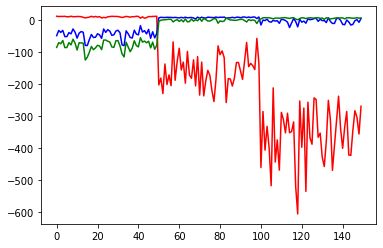

In [6]:
%pylab inline

x = range(n)
#print x

pl.plot(x, G[:,0], color='red')
pl.plot(x, G[:,1], color='blue')
pl.plot(x, G[:,2], color='green')

pl.show()
